<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/ANN_ADASYN_One_Word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [4]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())

In [5]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

numeric_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [8]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [9]:
adasyn = ADASYN(random_state=42)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train_processed, y_train)

In [10]:
model = Sequential([
    Dense(64, input_dim=X_train_bal.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

In [12]:
y_pred_ann = model.predict(X_test_processed)
y_pred_ann_label = (y_pred_ann > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step



ANN Model Results:
Accuracy: 0.8913043478260869

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Confusion Matrix:


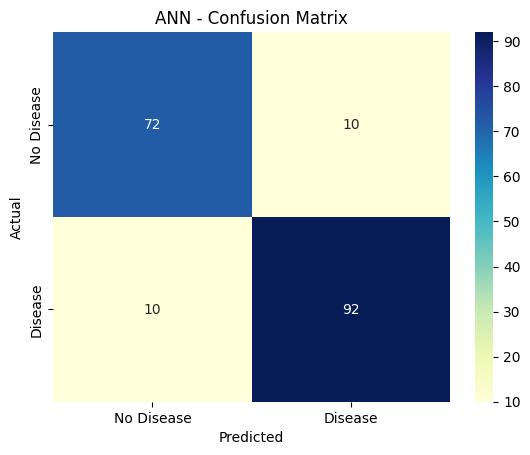

In [13]:
print("\nANN Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ann_label))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann_label))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_ann_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("ANN - Confusion Matrix")
plt.show()

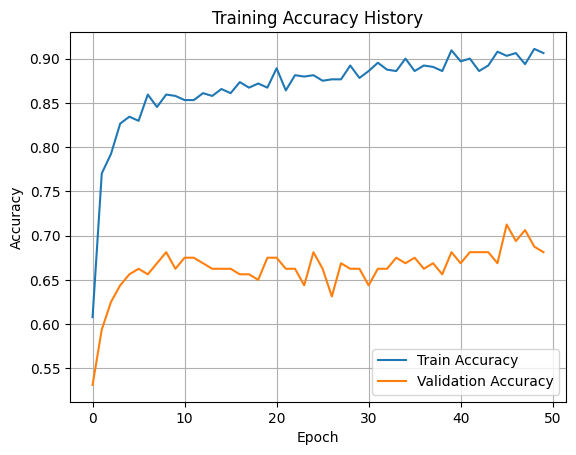

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy History")
plt.legend()
plt.grid(True)
plt.show()